In [1]:
# Load the necessary libraries
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from matplotlib import ticker
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

In [2]:
# Load the digits data
digits = load_digits()
X = pd.DataFrame(digits.data) / 255
y = digits.target

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [4]:
# Build a PCA model with 2 components and fit to training data
pca = PCA(n_components=2, random_state=123)
X_transformed = pca.fit_transform(X_train)

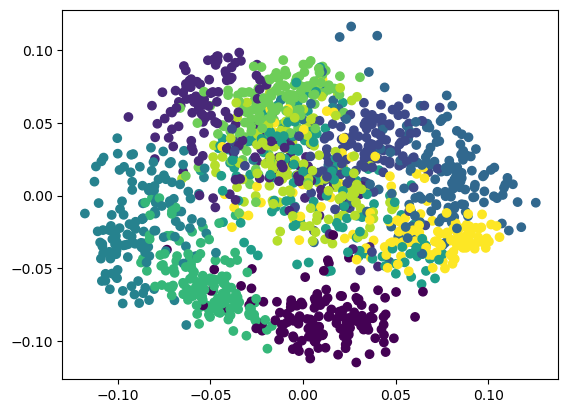

In [5]:
# Plot the PCA mapping
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=np.ravel(y_train), cmap='viridis')

In [6]:
# Build an t-SNE model with 2 components and 8 neighbors
tsne = TSNE(n_components=2, perplexity=45.0, random_state=123)

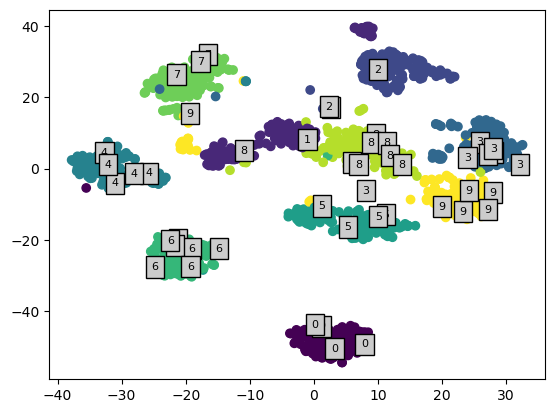

In [7]:
# Plot the t-SNE model mapping
X_transform_tsne = tsne.fit_transform(X_train)
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transform_tsne[:, 0], X_transform_tsne[:, 1], c=np.ravel(y_train), cmap='viridis')
# Add labels 0-9
count=0
for label , x, y in zip(y_train, X_transform_tsne[:, 0], X_transform_tsne[:, 1]):
    if count % 30 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', size=8,bbox=dict(boxstyle='square,pad=0.5', fc='0.8'))
    count = count + 1

In [8]:
# Display the data points in lower-dimensional space
pd.DataFrame(tsne.embedding_)

,0,1
0,5.382685,0.911440
1,-20.066694,6.003256
2,31.735806,4.134609
3,16.847612,27.462877
4,-24.316006,24.208435
...,...,...
1432,-20.643610,-25.729486
1433,26.325342,9.208890
1434,20.099251,-12.249377
1435,2.944223,-17.551495


In [9]:
# Display the KL divergence after optimization
tsne.kl_divergence_

0.6414300203323364

In [10]:
# Display the effective learning rate
tsne.learning_rate_

50.0